# Fake News Classifier
Authors: Emily Fuller | Franz-Anton La Rosee

## Table of Contents

[**1. Introduction**](#Introduction)

[**2. Data Subprocessing**](#Data-Sub-Processing)
 - [Importing Libraries](#Libraries)
 - [Import Data](#Import-Data)
 - [Data Cleaning](#Clean-Data)
     
[**3. Text Processing**](#Text-Processing)
 - [Applying Count Vectorizer](#Applying-Count-Vectorizer)
 - [Ngrams](#ngrams)
 - [Applying Lemmatization](#Applying-Lemmatization)

[**Modeling**](#Modeling) 
 - [Train/Test Split](#Train/Test-Split)

## 2. Data Subprocessing
### Importing Libraries

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot.plotters as skplt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import os

### Importing Data

In [135]:
# train Data
train = pd.read_csv('fake_or_real_news_training.csv')

# test Data
test = pd.read_csv('fake_or_real_news_test.csv')

### Data Cleaning

In [136]:
print(train.head())
print(train.info())

      ID                                              title  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                                text label   X1   X2  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  NaN  NaN  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  NaN  NaN  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  NaN  NaN  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  NaN  NaN  
4  It's primary day in New York and front-runners...  REAL  NaN  NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
ID       3999 non-null int64
title    3999 non-null object
text     3999 non-null object


We see there are 33 non-null objects in columns X1 and 2 non-null objects in X2. Below, the contents of these will be explored.

In [137]:
#Exploring X1 non-null columns
train.loc[train.X1.notnull()]

,ID,title,text,label,X1,X2
192,599,Election Day: No Legal Pot In Ohio,Democrats Lose In The South,Election Day: No Legal Pot In Ohio; Democrats ...,REAL,NaN
308,10194,Who rode it best? Jesse Jackson mounts up to f...,Leonardo DiCaprio to the rescue?,Who rode it best? Jesse Jackson mounts up to f...,FAKE,NaN
382,356,Black Hawk crashes off Florida,human remains found,(CNN) Thick fog forced authorities to suspend ...,REAL,NaN
660,2786,Afghanistan: 19 die in air attacks on hospital,U.S. investigating,(CNN) Aerial bombardments blew apart a Doctors...,REAL,NaN
889,3622,Al Qaeda rep says group directed Paris magazin...,US issues travel warning,A member of Al Qaeda's branch in Yemen said Fr...,REAL,NaN
911,7375,Shallow 5.4 magnitude earthquake rattles centr...,shakes buildings in Rome,00 UTC © USGS Map of the earthquake's epicent...,FAKE,NaN
1010,9097,ICE Agent Commits Suicide in NYC,Leaves Note Revealing Gov’t Plans to Round-up...,Email Print After writing a lengthy suicide no...,FAKE,NaN
1043,9203,Political Correctness for Yuengling Brewery,What About Our Opioid Epidemic?,We Are Change \n\nIn today’s political climate...,FAKE,NaN
1218,1602,Poll gives Biden edge over Clinton against GOP...,VP meets with Trumka,A new national poll shows Vice President Biden...,REAL,NaN
1438,4562,Russia begins airstrikes in Syria,U.S. warns of new concerns in conflict,Russian warplanes began airstrikes in Syria on...,REAL,NaN


In [138]:
# Exploring X2 non-nul columns
train.loc[train.X2.notnull()]

,ID,title,text,label,X1,X2
2184,9,Planned Parenthood’s lobbying effort,pay raises for federal workers,and the future Fed rates,PLANNED PARENTHOOD’S LOBBYING GETS AGGRESSIVE....,REAL
3537,6268,Chart Of The Day: Since 2009—–Recovery For The 5%,Stagnation for the 95%,Chart Of The Day: Since 2009 Recovery For The 5%,Stagnation for the 95%,FAKE


We see that some of the text was incorrectly pushed into subsequent columns due to additional commas in the text acting as delimiters. As we do not know how many commas are affecting the push or which column they stem from (title dimension or text dimension), it is impossible to infer logically where the pushed data originated from. As we are only going to work with one text column however, we merge all the data together 

In [139]:
#Dropping the 33 affected rows
train = train.loc[train.X1.isnull()]

In [140]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3966 entries, 0 to 3998
Data columns (total 6 columns):
ID       3966 non-null int64
title    3966 non-null object
text     3966 non-null object
label    3966 non-null object
X1       0 non-null object
X2       0 non-null object
dtypes: int64(1), object(5)
memory usage: 216.9+ KB
None


With the not-null columns in X1 and X2 removed, X1 and X2 become empty and ready to be removed.

In [141]:
# Dropping X1 & X2 Columns
train = train.drop(["X1", "X2"], axis=1)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3966 entries, 0 to 3998
Data columns (total 4 columns):
ID       3966 non-null int64
title    3966 non-null object
text     3966 non-null object
label    3966 non-null object
dtypes: int64(1), object(3)
memory usage: 154.9+ KB
None


In [142]:
#Text standardization
def clean(dataframe):

    # Removing numbers 
    dataframe['text'] = dataframe['text'].str.replace('[^A-Za-z]',' ')
    dataframe['title'] = dataframe['title'].str.replace('[^A-Za-z]',' ')

    # Transforming double-space to single 
    dataframe['text'] = dataframe['text'].str.replace('  ',' ')
    dataframe['title'] = dataframe['title'].str.replace('  ',' ')

    # Transform to lowercase
    dataframe['text'] = dataframe['text'].str.lower()
    dataframe['title'] = dataframe['title'].str.lower()


    print("New shape:", dataframe.shape)
    return dataframe.head() 

In [143]:
print(clean(train))
print(clean(test))

New shape: (3966, 4)
      ID                                              title  \
0   8476                       you can smell hillary s fear   
1  10294  watch the exact moment paul ryan committed pol...   
2   3608        kerry to go to paris in gesture of sympathy   
3  10142  bernie supporters on twitter erupt in anger ag...   
4    875    the battle of new york why this primary matters   

                                                text label  
0  daniel greenfield a shillman journalism fellow...  FAKE  
1  google pinterest digg linkedin reddit stumbleu...  FAKE  
2  u s secretary of state john f kerry said monda...  REAL  
3   kaydee king  kaydeeking november     the less...  FAKE  
4  it s primary day in new york and front runners...  REAL  
New shape: (2321, 3)
      ID                                              title  \
0  10498   september new homes sales rise  back to   level    
1   2439  why the obamacare doomsday cult can t admit it...   
2    864  sanders cruz r

In [144]:
# Label Booleaization
train["label"].loc[train["label"] == "FAKE"] = 1
train["label"].loc[train["label"] == "REAL"] = 0
train["label"] = train["label"].astype("category")
train.head()

,ID,title,text,label
0,8476,you can smell hillary s fear,daniel greenfield a shillman journalism fellow...,1
1,10294,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,1
2,3608,kerry to go to paris in gesture of sympathy,u s secretary of state john f kerry said monda...,0
3,10142,bernie supporters on twitter erupt in anger ag...,kaydee king kaydeeking november the less...,1
4,875,the battle of new york why this primary matters,it s primary day in new york and front runners...,0


In [145]:
# Checking for Null values
pd.DataFrame([train.isnull().sum(),test.isnull().sum()], index=["training data","test data"]).T

,training data,test data
ID,0.0,0.0
title,0.0,0.0
text,0.0,0.0
label,0.0,NaN


In [149]:
# Putting Title & Text together
train["all_text"] = train["title"] + [" "] + train["text"]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3966 entries, 0 to 3998
Data columns (total 5 columns):
ID          3966 non-null int64
title       3966 non-null object
text        3966 non-null object
label       3966 non-null category
all_text    3966 non-null object
dtypes: category(1), int64(1), object(3)
memory usage: 158.9+ KB


## Vectorization

Defining Bar Plot function, to plot unigrams:

In [153]:
def bar_plot(x, y, title, color):    
    
    # Set up barplot 
    plt.figure(figsize=(9,5))
    g=sns.barplot(x, y, color = color)    
    ax=g

    # Label the graph
    plt.title(title, fontsize = 15)
    plt.xticks(fontsize = 10)

    # Enable bar values
    # Code modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for p in ax.patches:
        totals.append(p.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for p in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(p.get_width()+.3, p.get_y()+.38, \
                int(p.get_width()), fontsize=10)

Real News Vectorizer ngram_range = (1,1):

In [154]:
# ngram_range = (1,1)

# Set variables to show real texts
mask_no = train['label'] == 0
df_real = train[mask_on]['text']

# Instantiate a CountVectorizer
cv2 = CountVectorizer(stop_words = 'english')

# Fit and transform the vectorizer on our corpus
real_cvec = cv2.fit_transform(df_real)

# Convert real_cvec into a DataFrame
real_cvec_df = pd.DataFrame(real_cvec.toarray(),
                   columns=cv2.get_feature_names())

# Inspect head of real_cvec_df
print(real_cvec_df.shape)

(1976, 41500)


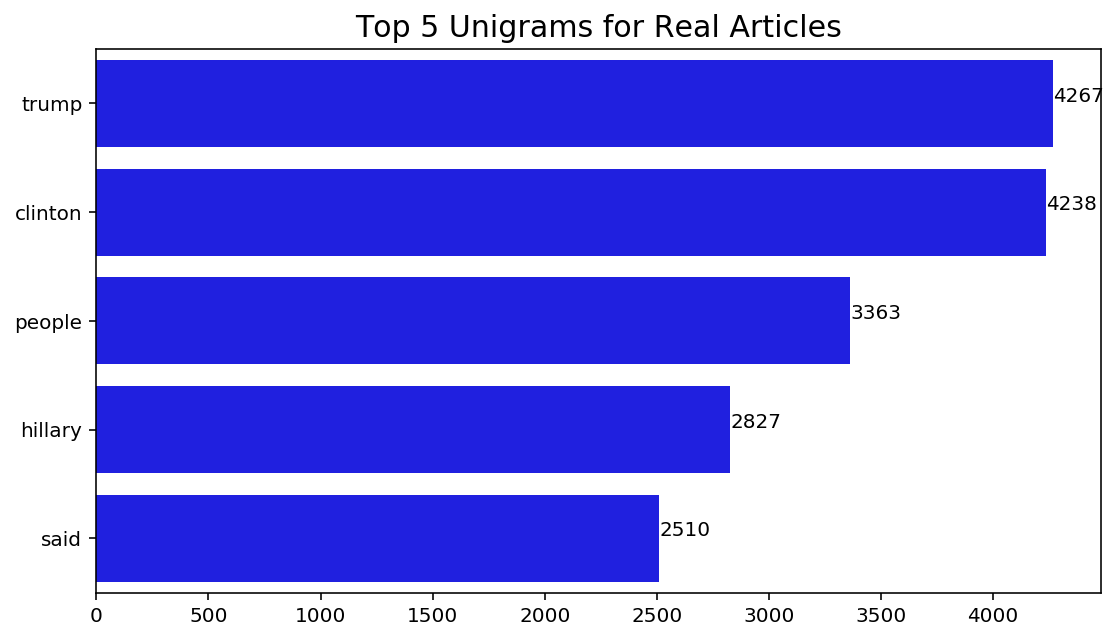

In [166]:
# Setting up variables to contain top 5 most frequent words in real articles
real_wc = real_cvec_df.sum(axis = 0)
real_top_5 = real_wc.sort_values(ascending=False).head(5)

# Calling our "bar_plot" function
bar_plot(real_top_5.values, real_top_5.index, 'Top 5 Unigrams for Real Articles','b')

Real News Vectorizer ngram_range = (2,2):

In [168]:
# Set variables to show real texts
mask = train['label'] == 0
df_real = train[mask]['text']

# Instantiate a CountVectorizer
cv = CountVectorizer(stop_words = 'english', ngram_range=(2,2))

# Fit and transform the vectorizer on our corpus
real_cvec = cv.fit_transform(df_real)

# Convert onion_cvec into a DataFrame
real_cvec_df = pd.DataFrame(real_cvec.toarray(),
                   columns=cv.get_feature_names())

# Inspect head of real_cvec_df
print(real_cvec_df.shape)

(1990, 603732)


Fake News Vectorizer:

In [163]:
#ngram_range = (1,1)

# Set variables to show fake texts
mask_on = train['label'] == 1
df_fake = train[mask_on]['text']

# Instantiate a CountVectorizer
cv1 = CountVectorizer(stop_words = 'english')

# Fit and transform the vectorizer on our corpus
fake_cvec = cv1.fit_transform(df_fake)

# Convert fake_cvec into a DataFrame
fake_cvec_df = pd.DataFrame(fake_cvec.toarray(),
                   columns=cv1.get_feature_names())

# Inspect head of fake_cvec_df
print(fake_cvec_df.shape)

(1976, 41500)


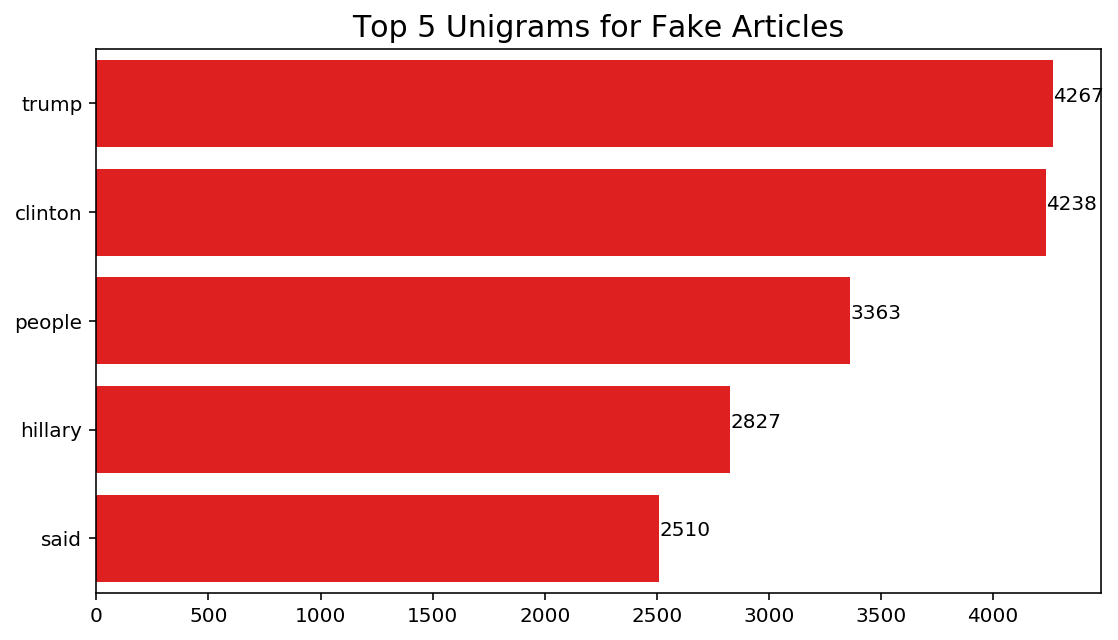

In [164]:
# Setting up variables to contain top 5 most frequent words in fake articles
fake_wc = fake_cvec_df.sum(axis=0)
fake_top_5 = fake_wc.sort_values(ascending=False).head(5)

# Calling our "bar_plot" function
bar_plot(fake_top_5.values, fake_top_5.index, "Top 5 Unigrams for Fake Articles", "r")

In [170]:
# Set variables to show real texts
mask = train['label'] == 0
df_real = train[mask]['text']

# Instantiate a CountVectorizer
cv = CountVectorizer(stop_words = 'english', ngram_range=(2,2))

# Fit and transform the vectorizer on our corpus
real_cvec = cv.fit_transform(df_real)

# Convert onion_cvec into a DataFrame
real_cvec_df = pd.DataFrame(real_cvec.toarray(),
                   columns=cv.get_feature_names())

# Inspect head of real_cvec_df
print(real_cvec_df.shape)

(1990, 603732)
